# 🧭 01_EDA — Разведочный анализ данных

В этом ноутбуке проводится первичный **разведочный анализ данных (Exploratory Data Analysis, EDA)**, направленный на получение общего понимания структуры и особенностей набора данных.

---

### 📋 Основные этапы анализа:
1. **Импорт библиотек**
2. **Загрузка и первичный осмотр данных**
3. **Общая информация о датасете**
4. **Анализ пропусков и дубликатов**
5. **Описательная статистика**
6. **Визуализация распределений количественных и категориальных признаков**
7. **Анализ корреляций между переменными**

---

### 🎯 Цель этапа
Сформировать общее представление о данных, выявить закономерности и аномалии, оценить качество информации и подготовить основу для **дальнейшего статистического анализа и проверки гипотез**.

---

## 1. Импорт библиотек

In [1]:
import pandas as pd

from utils.visualization import plot_hist_boxplot, plot_scatterplot

## 2. Загрузка и первичный просмотр данных

Необходимые данные находятся в файле **`flats_moscow.csv`**.

Прочитаем и выведем первые пять строк датасета для первичного осмотра.

In [2]:
flats = pd.read_csv("../data/raw/flats_moscow.csv")

In [3]:
flats.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


Таблица содержит следующую важную информацию о параметрах квартир:

- **price** — количественный признак, отражающий **цену квартиры**.
- **totsp** — количественный признак, обозначающий **общую площадь квартиры** (в м²).
- **livesp** — количественный признак, обозначающий **жилую площадь квартиры** (в м²).
- **kitsp** — количественный признак, обозначающий **площадь кухни** (в м²).
- **dist** — количественный признак, показывающий **расстояние до центра города** (в км).
- **metrdist** — количественный признак, отражающий **время до ближайшего метро** (в минутах).
- **walk** — количественный признак (будет преобразован в **категориальный бинарный**), указывающий, **можно ли дойти до метро пешком**.
- **brick** — количественный признак (будет преобразован в **категориальный бинарный**), показывающий, **является ли дом кирпичным**.
- **floor** — количественный признак (будет преобразован в **категориальный бинарный**), определяющий, **находится ли квартира не на первом и не на последнем этаже**.

## 3. Общая информация о датасете

In [4]:
print(f"Размер после очистки: {flats.shape[0]} строк, {flats.shape[1]} колонок")

Размер после очистки: 2040 строк, 11 колонок


In [5]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


Мы видим среди данных **два лишних столбца**, которые не несут полезной информации:
`Unnamed: 0` и `code`.

> 💡 Эти столбцы следует удалить при очистке данных,
> так как они не влияют на анализ и не содержат полезных признаков.

## 4. Анализ пропусков

In [6]:
missed_count = flats.isnull().sum().sum()
missed_cells = missed_count / (flats.shape[0] * flats.shape[1])
missed_rows = (flats.isnull().sum(axis=1) > 0).sum() / flats.shape[0]

print("\033[1m" + "\nПроверка пропусков" + "\033[0m")
print(f"Кол-во пропусков: {missed_count}")
print(f"Доля пропусков: {missed_cells:.1%}")
print(f"Доля строк с пропусками: {missed_rows:.1%}")


Проверка пропусков
Кол-во пропусков: 0
Доля пропусков: 0.0%
Доля строк с пропусками: 0.0%


### 🔍 Вывод:

В датасете **отсутствуют пропуски**.
Доля строк с пропусками — **0.0%**.

## 5. Анализ дубликатов

In [7]:
duplicates_count = flats.duplicated().sum()

print("\033[1m" + "\nПроверка на дубликаты" + "\033[0m")
print(f"Кол-ва дубликатов: {duplicates_count}")


Проверка на дубликаты
Кол-ва дубликатов: 0


### 🔍 Вывод:

Дубликаты **не обнаружены** — все записи уникальны.

## 6. Описательная статистика и визуализация распределений

### Визуализация распределений признаков

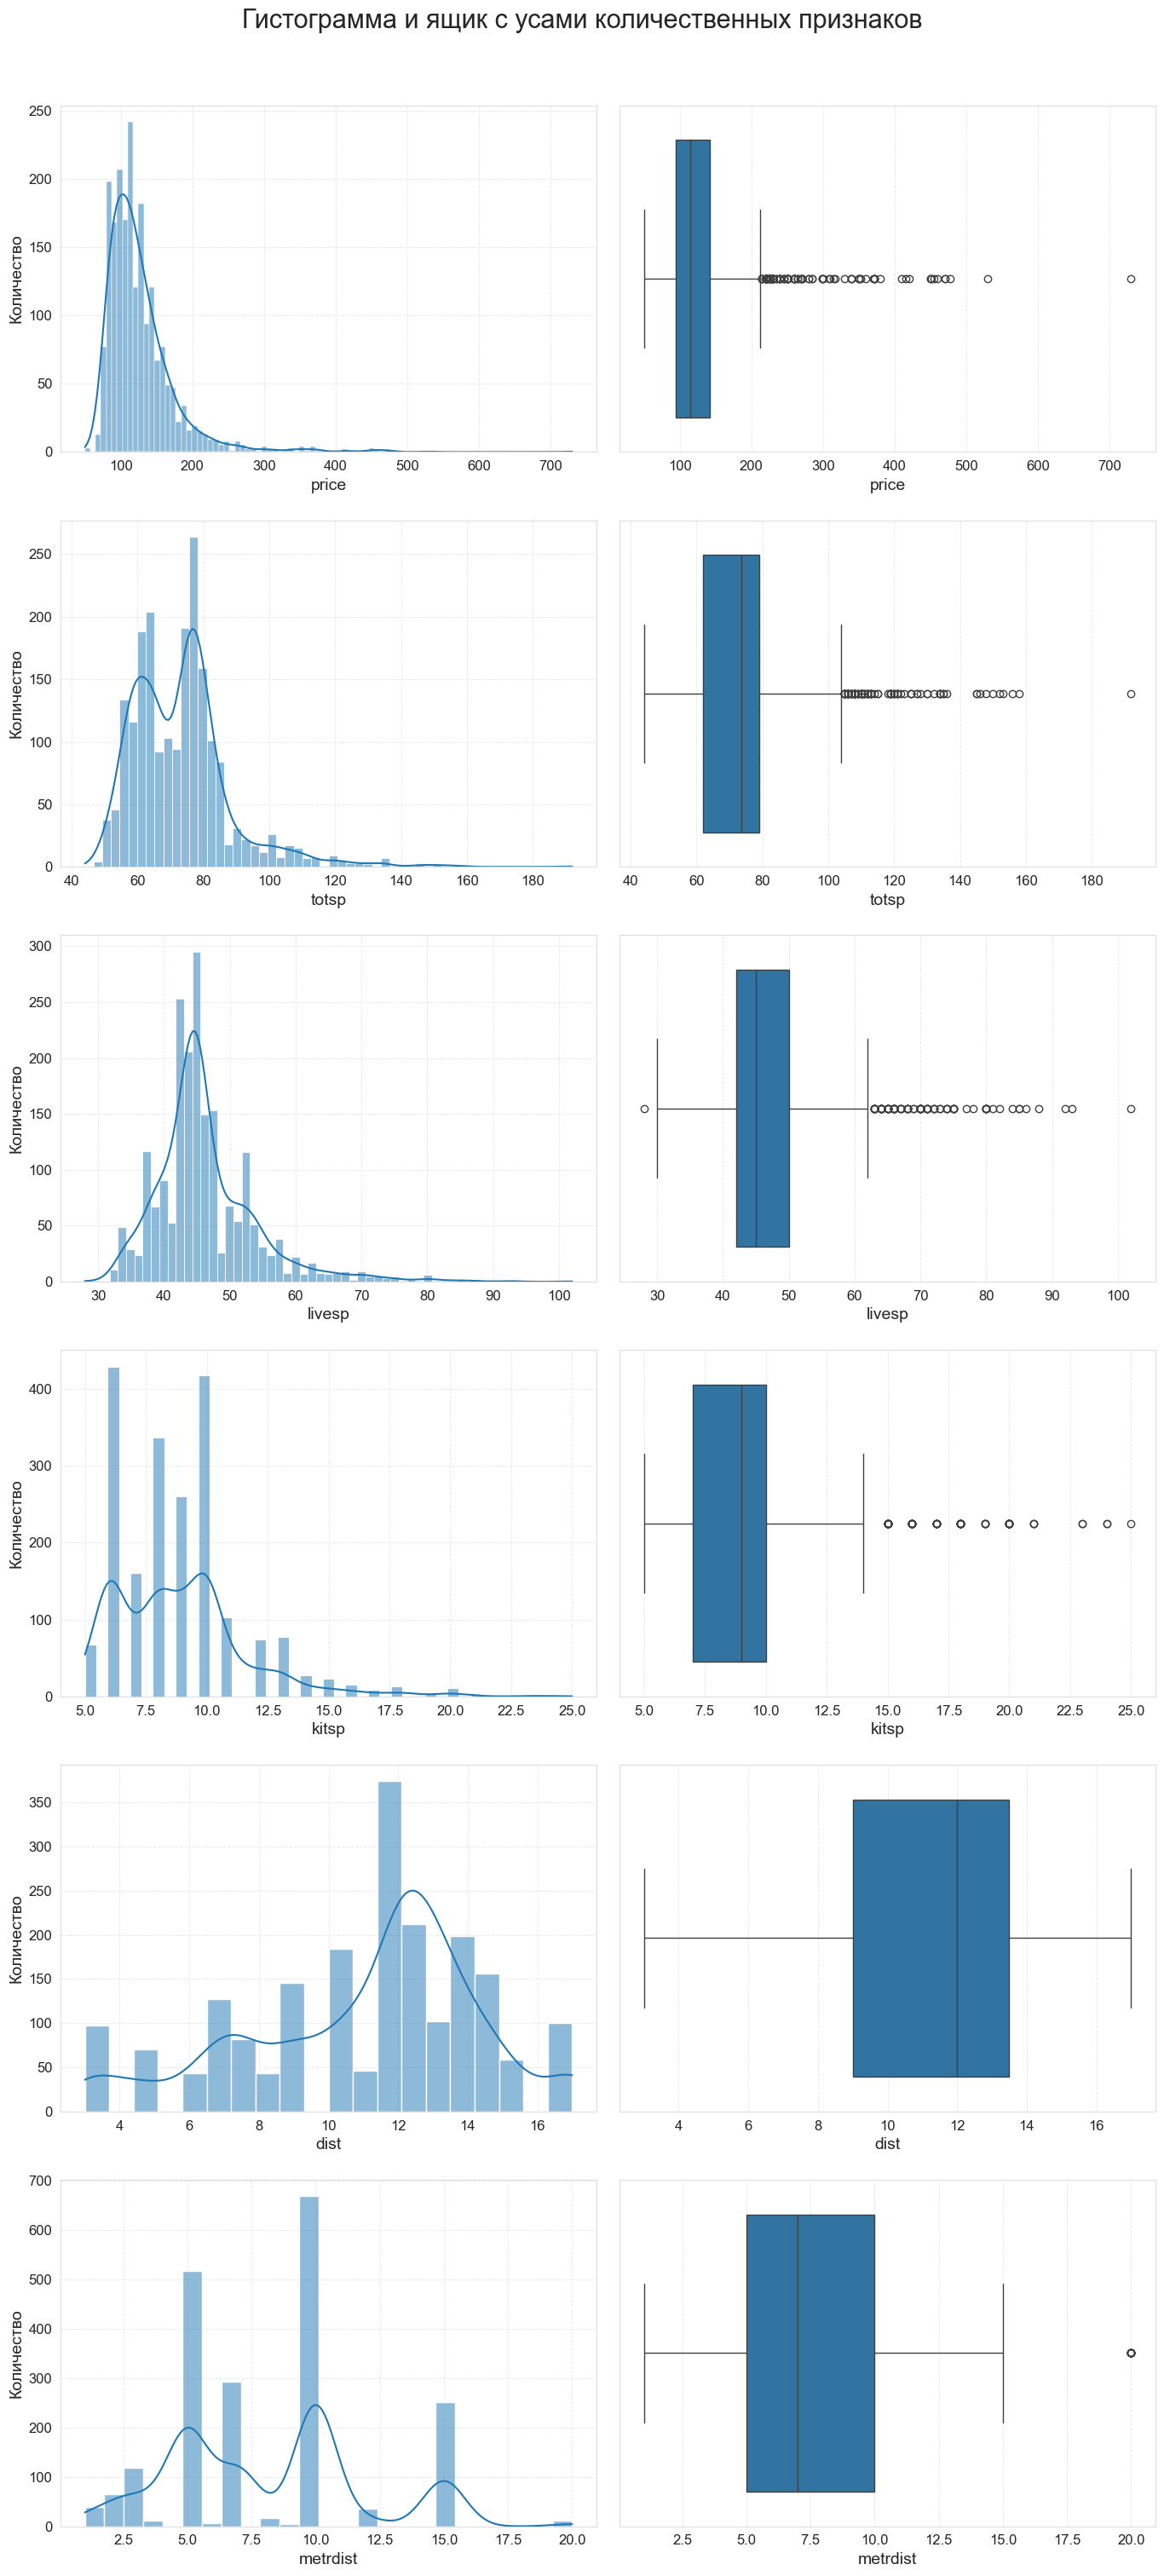

In [8]:
columns = flats.select_dtypes(exclude=object).columns.drop(["Unnamed: 0", "code", "brick", "floor", "walk"])
plot_hist_boxplot(flats, columns, kde=True, save_path="../images/eda/hist_boxplot.png")

### Статистические характеристики признаков

In [9]:
flats.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2040.0,1020.500000,589.041594,1.0,510.75,1020.5,1530.25,2040.0
price,2040.0,127.496569,51.878220,50.0,95.00,115.0,142.00,730.0
totsp,2040.0,73.084314,15.123450,44.0,62.00,73.5,79.00,192.0
livesp,2040.0,46.337255,7.894348,28.0,42.00,45.0,50.00,102.0
kitsp,2040.0,8.898529,2.787073,5.0,7.00,9.0,10.00,25.0
dist,2040.0,11.015686,3.375539,3.0,9.00,12.0,13.50,17.0
metrdist,2040.0,8.117157,3.815574,1.0,5.00,7.0,10.00,20.0
walk,2040.0,0.685784,0.464317,0.0,0.00,1.0,1.00,1.0
brick,2040.0,0.323039,0.467752,0.0,0.00,0.0,1.00,1.0
floor,2040.0,0.790686,0.406918,0.0,1.00,1.0,1.00,1.0


### 📊 Анализ распределения количественных и бинарных признаков

По результатам анализа распределений можно сделать следующие выводы:

> **Ни один количественный столбец не имеет нормального распределения**, следовательно, для анализа предпочтительно использовать **медиану** и **межквартильный размах**, а не среднее значение.

---

#### 💰 price — Цена квартиры
- Распределение **асимметричное с длинным правым хвостом**, указывающим на наличие **экстремальных значений** (элитных квартир).
- **Медиана:** 115 млн
- **Стандартное отклонение:** 51.88
- **Минимум:** 50 млн
- **Максимум:** 730 млн *(экстремум)*

---

#### 🏢 totsp — Общая площадь
- Распределение **биомодальное и правоскошенное**.
- Вероятная причина — **наличие нескольких типов квартир** (например, двухкомнатные и трёхкомнатные), что создаёт два пика на графике.
- **Медиана:** 73.5 м²
- **Стандартное отклонение:** 15.12
- **Минимум:** 44
- **Максимум:** 192 *(экстремум)*

---

#### 🛋️ livesp — Жилая площадь
- Распределение **асимметричное, правоскошенное**, с выраженными пиками, соответствующими различным планировкам.
- **Медиана:** 45.0 м²
- **Стандартное отклонение:** 7.89
- **Минимум:** 28
- **Максимум:** 102 *(экстремум)*

---

#### 🍽️ kitsp — Площадь кухни
- Распределение **правоскошенное и мультимодальное** — наблюдаются локальные пики в диапазонах **6–7**, **8–9** и **10–11** м².
- Это может быть связано с **типовыми проектами домов**, где часто повторяются одинаковые размеры кухонь.
- **Медиана:** 9.0 м²
- **Стандартное отклонение:** 2.79
- **Минимум:** 5
- **Максимум:** 25

---

#### 📍 dist — Удалённость от центра
- Распределение **правоскошенное и мультимодальное**.
- Основная масса значений сосредоточена в диапазоне **7–15 км**, с пиком около **12 км**.
- Многомодальность может отражать **зональную структуру города** (например, центр, срединные районы, окраины).
- **Медиана:** 12.0 км
- **Стандартное отклонение:** 3.38
- **Минимум:** 3
- **Максимум:** 17 *(экстремум)*

---

#### 🚇 metrdist — Время до метро
- Распределение **мультимодальное**: значения концентрируются в диапазоне **2–12 мин**, но встречаются отдельные выбросы до **20 мин**.
- Многомодальность, вероятно, вызвана **неоднородной застройкой**: часть районов находится в пешей доступности до метро, а часть — значительно дальше.
- **Медиана:** 7.0 мин
- **Стандартное отклонение:** 3.82
- **Минимум:** 1
- **Максимум:** 20 *(экстремум)*

---

### ⚙️ Анализ бинарных признаков

| Признак | Среднее | Интерпретация | Вывод |
|----------|----------|----------------|--------|
| **walk** | 0.6858 | ≈68.6% квартир расположены в пешей доступности от метро | Большинство объектов удобно расположены относительно метро |
| **brick** | 0.3230 | ≈32.3% квартир находятся в кирпичных домах | Кирпичные дома составляют меньшую часть выборки |
| **floor** | 0.7907 | ≈79.1% квартир не на первом и не на последнем этаже | Большинство квартир находятся на «комфортных» этажах |

---

### 📚 Причины многомодальности

1. **Типовые проекты домов** — одинаковые планировки создают повторяющиеся значения площадей (особенно кухонь и жилых комнат).
2. **Различие классов жилья** — эконом, комфорт, бизнес-класс часто образуют отдельные «пики» в распределении по цене и площади.
3. **Зональность города** — расстояние до центра или метро может группироваться по районам, где концентрация застройки неоднородна.

---

**Общий вывод:**
Многие признаки демонстрируют **мультимодальность и асимметрию**, что отражает разнообразие планировок, типов домов и географических зон. Для анализа таких данных лучше применять **робастные статистики** (медиана, IQR) и **непараметрические методы** проверки гипотез.

## 8. Анализ корреляций

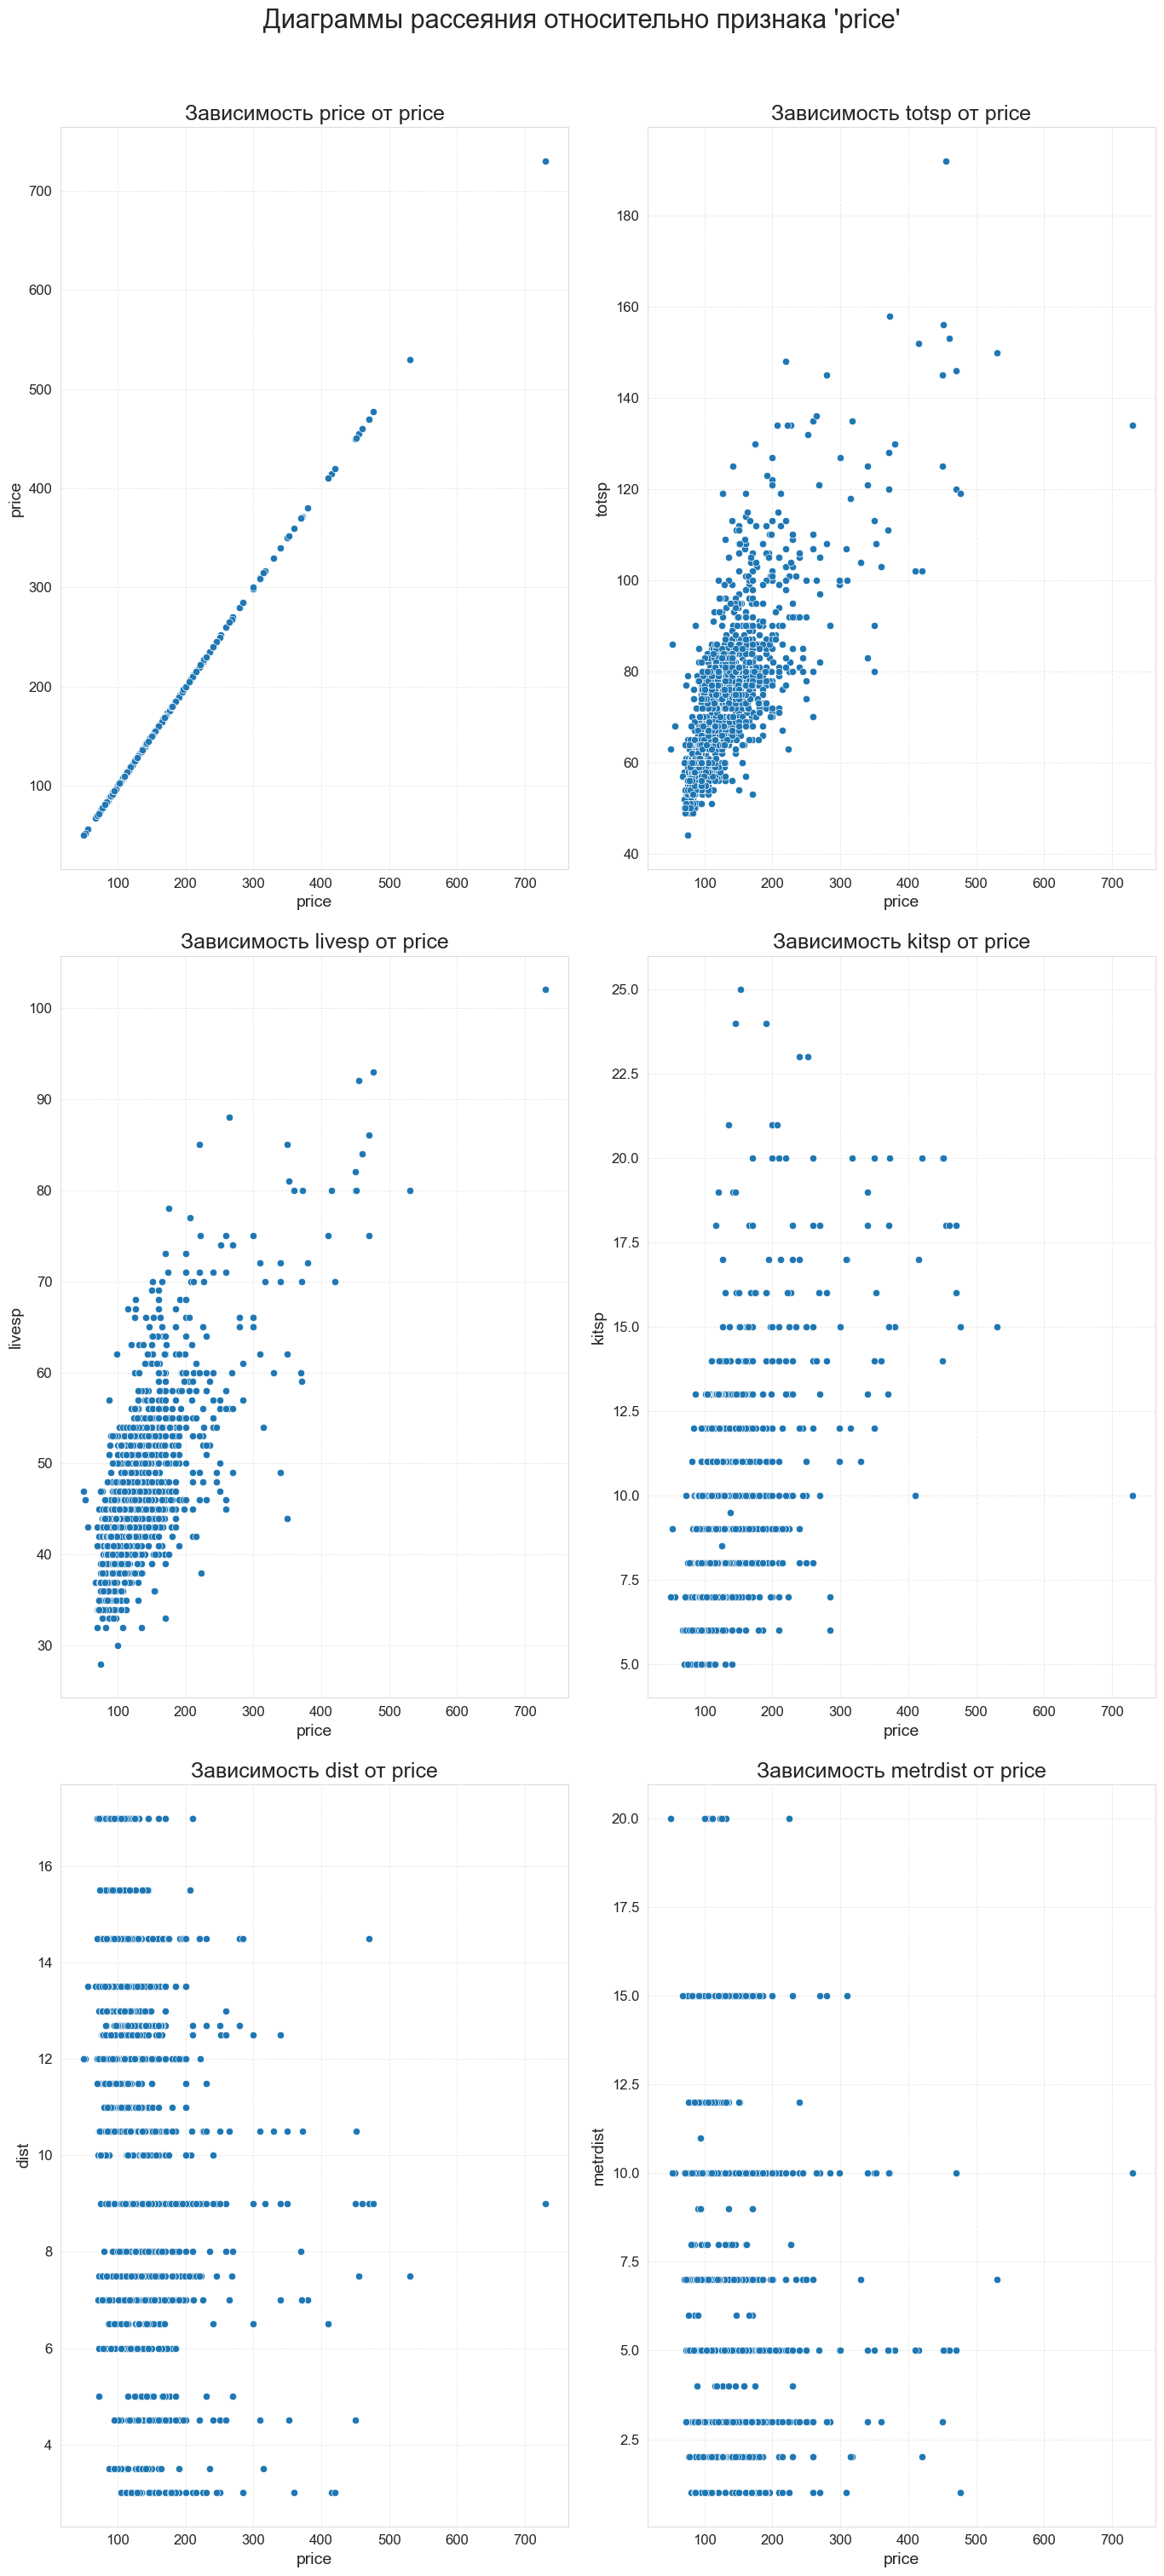

In [10]:
columns = flats.select_dtypes(exclude=object).columns.drop(["Unnamed: 0", "code", "brick", "floor", "walk"])
plot_scatterplot(flats, "price", columns, save_path="../images/eda/scatterplot.png")

In [11]:
corr_price = flats.corr(numeric_only=True, method="spearman")["price"]
corr_price

Unnamed: 0   -0.024281
price         1.000000
totsp         0.768785
livesp        0.671953
kitsp         0.651975
dist         -0.366695
metrdist     -0.153349
walk          0.176057
brick         0.273369
floor         0.156869
code         -0.086993
Name: price, dtype: float64

### 📈 Взаимосвязь признаков с ценой жилья

На основе **графиков рассеяния** и **коэффициентов корреляции** можно сделать следующие выводы о взаимосвязи различных факторов с ценой:

- **Общая площадь жилья (`totsp`)** — **сильная положительная корреляция (r = 0.769)**. Чем больше общая площадь квартиры, тем выше её стоимость.
- **Жилая площадь (`livesp`)** — **умеренная положительная корреляция (r = 0.672)**. Увеличение жилой площади также способствует росту цены, хотя связь немного слабее.
- **Площадь кухни (`kitsp`)** — **умеренная положительная корреляция (r = 0.652)**. Большая кухня ассоциируется с более дорогим жильём.
- **Удалённость от центра (`dist`)** — **умеренная отрицательная корреляция (r = –0.367)**. Чем дальше объект от центра города, тем, как правило, ниже его цена.
- **Удалённость от метро (`metrdist`)** — **слабая отрицательная корреляция (r = –0.150)**. Связь присутствует, но выражена слабо — близость к метро влияет на цену, но не является определяющим фактором.

**Вывод:**
Наибольшее влияние на стоимость оказывают показатели, связанные с площадью (особенно общая площадь). Пространственные факторы (удалённость от центра и метро) также влияют на цену, но в меньшей степени.